# DreamCatalyst Diffusion Optimization Notebook
This notebook runs the SDS/DDS/DWT-DDS optimization interactively using your model pipeline.

In [1]:
# If needed, install dependencies
# !pip install diffusers pytorch_wavelets transformers accelerate


In [2]:
import os
import torch
import numpy as np
from PIL import Image
from diffusers import StableDiffusionPipeline
from utils.run2d import image_optimization  # Ensure run2d.py is in the same directory or module path
from utils.utils_ import load_512
from utils.os_related import find_final_in_latest

In [11]:
# Set paths and parameters
image_path = "data/image_1.g"  # <-- Change to your image path
source_prompt = "a photo of two reflective spheres"
target_prompt = "a photo of two red reflective spheres"

num_iters = 200
guidance_scale = 7.5
wavelet = "db8"
J = 1
use_dds = True
dwt_dds = True
keep_low = False
keep_high = False
disable_wavelet = True
vis_method = "linear"
vis_interval = 10
save_interval = 50
profiling_enabled = False
results_dir = None  # will be auto-named


In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_id = "runwayml/stable-diffusion-v1-5"
pipeline = StableDiffusionPipeline.from_pretrained(model_id).to(device)
image = load_512(image_path)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [13]:
image_optimization(
    pipe=pipeline,
    image=image,
    text_source=source_prompt,
    text_target=target_prompt,
    num_iters=num_iters,
    gs=guidance_scale,
    use_dds=use_dds,
    dwt_dds=dwt_dds,
    keep_low=keep_low,
    keep_high=keep_high,
    disable_wavelet=disable_wavelet,
    wavelet=wavelet,
    J=J,
    seed=42,
    results_dir=results_dir,
    image_path=image_path,
    vis_method=vis_method,
    vis_interval=vis_interval,
    save_interval=save_interval,
    profiling_enabled=profiling_enabled
)


==> use dds: True
==> source prompt: a photo of a blue car, target prompt: a photo of a red car
==> using wavelet db2 with J=1
==> Visualization method: linear, interval: 10

IMAGE OPTIMIZATION SETTINGS
Source image: image_4.png
Source prompt: "a photo of a blue car"
Target prompt: "a photo of a red car"
Method: DDS+DWT
Guidance scale: 20
Iterations: 300
Wavelet type: db2
Decomposition levels (J): 1
Wavelet mode: Visualization only (no gradient zeroing)
Output directory: output/image_4_a_photo_of_a_red_car_20250422_221459
Visualization: linear (every 10 iterations)



Optimizing: 100%|██████████████| 300/300 [00:26<00:00, 11.50iter/s, loss=0.0545]


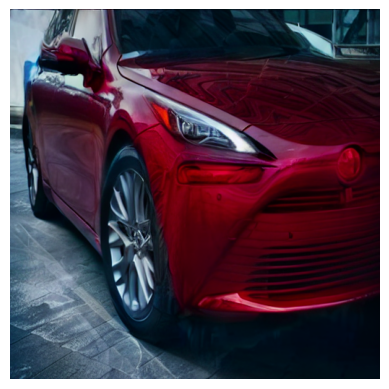

In [14]:
import matplotlib.pyplot as plt
path = "output"
img_path = find_final_in_latest(path)
a = plt.imread(img_path)
plt.figure()
plt.imshow(a)
plt.axis("off")
plt.show()

In [45]:
import os
import numpy as np
import matplotlib.pyplot as plt

image_name = "image_6"
out_dir = f"comparison/{image_name}"
os.makedirs(out_dir, exist_ok=True)


# Correct order: filename first, array second
plt.imsave(f"{out_dir}/ext.png", a)